## 차원 축소

In [1]:
# 파이썬≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

mpl.rcParams['axes.unicode_minus'] = False

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

import seaborn as sns

import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 노트북 실행 결과를 동일하게 유지하기 위해
# np.random.seed(42)#

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
# 통계량 계산이나 기본적인 데이터분석을 위한 패키지
import scipy as sp
import scipy.stats

#시각화 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#시각화에서 음수를 표현하기 위한 설정
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3

# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3

# 경고창 지우기 - 경진대회에서만 사용
import warnings
warnings.filterwarnings('ignore')

### PCA(차원 축소)

In [11]:
# 3차원 데이터 생성
np.random.seed(42)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 3 -0.5
X = np.empty((m,3))
X[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) /2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) /2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise + np.random.randn(m)
print(X[:5])

[[ 1.019  0.43   1.294]
 [-0.525  0.447  0.594]
 [ 0.237  0.776  1.179]
 [ 0.733  0.696  2.279]
 [ 1.012  0.006 -0.042]]


In [12]:
from sklearn.decomposition import PCA
#2개의 피처로 주성분 분석을 수행
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

print(X2D[:5])

[[ 0.885 -0.334]
 [ 0.09   1.113]
 [ 0.736  0.508]
 [ 1.861  0.063]
 [-0.467 -0.514]]


In [13]:
# 분산 비율 확인
print(pca.explained_variance_ratio_)

# 첫번째 주성분이 74% 정도 데이터를 설명할 수 있고
# 두번째 주성분은 21% 정도 설명 가능
# 5% 은 데이터 소실

[0.738 0.21 ]


In [19]:
# 데이터 복원
X3D_inv = pca.inverse_transform(X2D)
print("[복원된 데이터]")
print(X3D_inv[:5])
print("===================")

print("[원본 데이터]")
print(X[:5])
print("===================")

# 원본 데이터와 복원된 데이터를 비교
print(np.allclose(X3D_inv, X))
print("===================")

# 차이의 평균
print(np.mean(np.sum(np.square(X3D_inv - X), axis = 1)))
print("===================")


[복원된 데이터]
[[ 0.975  0.284  1.304]
 [-0.459  0.666  0.58 ]
 [ 0.161  0.521  1.195]
 [ 0.657  0.443  2.295]
 [ 1.061  0.17  -0.053]]
[원본 데이터]
[[ 1.019  0.43   1.294]
 [-0.525  0.447  0.594]
 [ 0.237  0.776  1.179]
 [ 0.733  0.696  2.279]
 [ 1.012  0.006 -0.042]]
False
0.07836731698475538


### 적절한 차원 수 선택

In [23]:
# 데이터 가져오기
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

#이미지 데이터 전부 가져오기
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)

In [26]:
# 데이터 분할하기
mnist.target = mnist.target.astype(np.uint8)

X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

# X_train 은 784개의 피쳐를 가진 데이터 
print(X_train.shape)

(52500, 784)


In [29]:
# 차원 수를 지정해서 PCA 수행 : 154 개의 피처로 주성분 분석 수행
pca = PCA(n_components = 154)
pca.fit_transform(X_train)

# 분산의 비율 확인
# print(pca.explained_variance_ratio_)

# 분산의 비율의 합계 - 95%
print(pca.explained_variance_ratio_.sum())

0.9500532025918321


In [30]:
# 차원 수를 지정해서 PCA 수행 : 95% 이상되는 주성분의 개수로 주성분 분석
pca = PCA(n_components = 0.95)
pca.fit_transform(X_train)
print(pca.explained_variance_ratio_.sum())

0.9504506731634907


In [31]:
# 주성분 분석
print(pca.n_components_)

154


### Random PCA

In [35]:
pca = PCA(n_components = 154 , svd_solver = 'randomized')
pca.fit_transform(X_train)
print(pca.explained_variance_ratio_.sum())

# 랜덤이라, 최적화를 하지 않아서 조금더 정보를 많이 잃어버린다.

0.9500581769629755


### 3가지 PCA 훈련 방식의 훈련시간 비교

In [54]:
import time
start = time.time()

# 일반 PCA
pca = PCA(n_components = 154, svd_solver = 'full')
pca.fit_transform(X_train)

# 피처가 154로 크기 때문에 얘도 랜덤 PCA
# pca = PCA(n_components = 154)
# pca.fit_transform(X_train)

end = time.time()
print('PCA 수행시간 : ', (end - start))
print(pca.explained_variance_ratio_.sum())

PCA 수행시간 :  3.8745667934417725
0.9504506731634907


In [51]:
start = time.time()

#랜덤 PCA
pca = PCA(n_components = 154, svd_solver = 'randomized')
pca.fit_transform(X_train)

end = time.time()
print('PCA 수행시간 : ', (end - start))
print(pca.explained_variance_ratio_.sum())

PCA 수행시간 :  2.443175792694092
0.950109609498422


In [53]:
from sklearn.decomposition import IncrementalPCA

start = time.time()

# 배치 사이즈 : 데이터를 몇 개씩 훈련
n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)
for X_batch in np.array_split(X_train, n_batches) :
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)

end = time.time()
print('PCA 수행시간 : ', (end - start))
print(pca.explained_variance_ratio_.sum())

PCA 수행시간 :  19.31574821472168
0.950109609498422


### Kernal PCA

In [57]:
from sklearn.datasets import make_swiss_roll
# X 는 3차원 피처가 되고, t 는 범주가 됩니다.
# 스위스롤 같은 데이터는 차원 축소를 수행하거나 분류를 수행하는 경우는
# 선형으로 차원 축소를 수행하거나 분류를 수행할 수 없습니다.
X, t = make_swiss_roll(n_samples = 1000, noise = 0.2, random_state = 42)
print(X)

[[-3.297  4.262  7.698]
 [ 5.96  11.458 12.726]
 [ 6.661 18.158 -9.847]
 ...
 [ 6.184  1.441 -1.712]
 [ 5.861  1.092 12.471]
 [-8.162  5.612  4.512]]


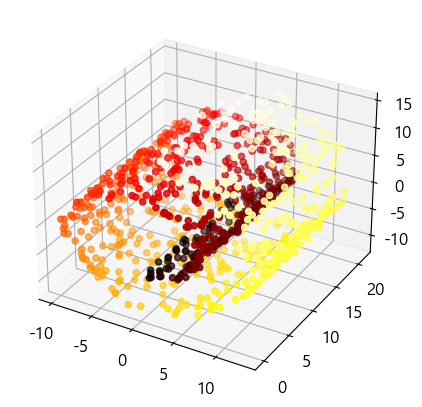

In [59]:
# 시각화
axes = [-11.5, 14, -2, 23, -12, 15]
fig = plt.figure(figsize = (6, 5))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = t, cmap = plt.cm.hot)
plt.show()

In [76]:
from sklearn.decomposition import KernelPCA

pca = PCA(n_components = 2)
pca.fit_transform(X)
print(pca.explained_variance_ratio_.sum())

kernel_pca = KernelPCA(n_components = 2, kernel = 'linear',
                    fit_inverse_transform = True)
result = kernel_pca.fit_transform(X)

# Kernel PCA는 분산의 비율을 직접 계산해야합니다.
explained_variance = np.var(result, axis = 0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print(explained_variance_ratio)
print(explained_variance_ratio.sum())

0.7098258574944847
[0.575 0.425]
0.9999999999999999


In [75]:
from sklearn.decomposition import KernelPCA

pca = PCA(n_components = 2)
pca.fit_transform(X)
print(pca.explained_variance_ratio_.sum())

kernel_pca = KernelPCA(n_components = 2, kernel = 'sigmoid',
                    fit_inverse_transform = True,
                    coef0 = 1, gamma = 0.0001)
result = kernel_pca.fit_transform(X)

# Kernel PCA는 분산의 비율을 직접 계산해야합니다.
explained_variance = np.var(result, axis = 0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print(explained_variance_ratio)
print(explained_variance_ratio.sum())

0.7098258574944842
[0.575 0.425]
1.0


In [74]:
from sklearn.decomposition import KernelPCA

pca = PCA(n_components = 2)
pca.fit_transform(X)
print(pca.explained_variance_ratio_.sum())

kernel_pca = KernelPCA(n_components = 2, kernel = 'rbf',
                    fit_inverse_transform = True,
                    coef0 = 1, gamma = 0.0001)
result = kernel_pca.fit_transform(X)

# Kernel PCA는 분산의 비율을 직접 계산해야합니다.
explained_variance = np.var(result, axis = 0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print(explained_variance_ratio)
print(explained_variance_ratio.sum())

0.7098258574944842
[0.573 0.427]
1.0


### 이미지 데이터에 잡음을 추가하고 PCA를 수행

In [77]:
from sklearn.datasets import load_digits

digits = load_digits()
# 8*8 의 MNIST 데이터 가져오기
digits.data.shape

(1797, 64)

In [78]:
# 이미지 출력
def plot_digits(data) :
    fig, axes = plt.subplots(4, 10, figsize = (10, 4),
                            subplot_kw = {'xticks' : [], 'yticks' : []},
                            gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i , ax in enumerate(axes.flat) :
        ax.imshow(data[i].reshape(8, 8), cmap = 'binary',
                 interpolation = 'nearest', clim = (0, 16))
    
    

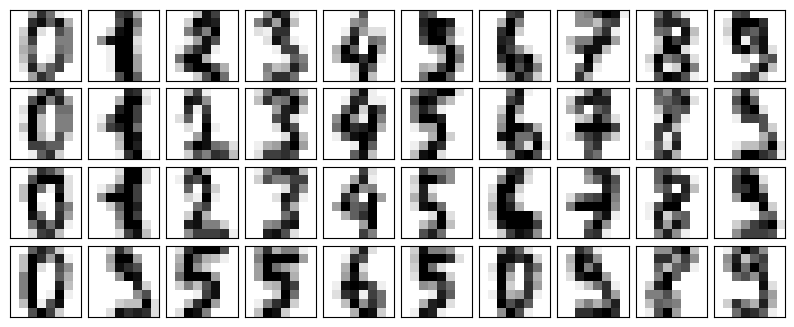

In [80]:
# 원본 이미지 출력
plot_digits(digits.data)

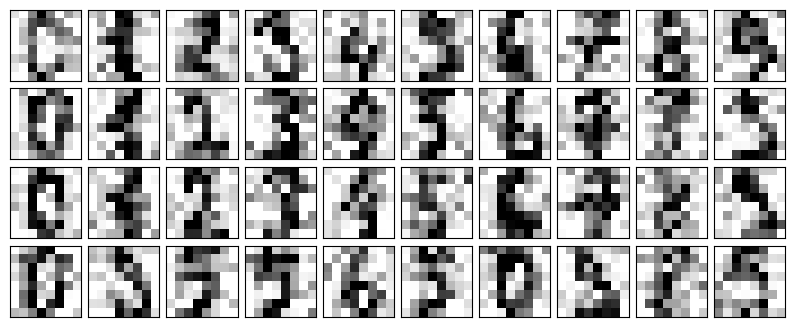

In [81]:
# 잡음을 섞은 이미지 생성
np.random.seed(42)

noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [88]:
# 주성분 분석
from sklearn.decomposition import PCA

# 70% 정도의 분산을 나타내는데 26개의 피처가 필요
pca = PCA(n_components = 0.7).fit(noisy)
print(pca.n_components_)

26


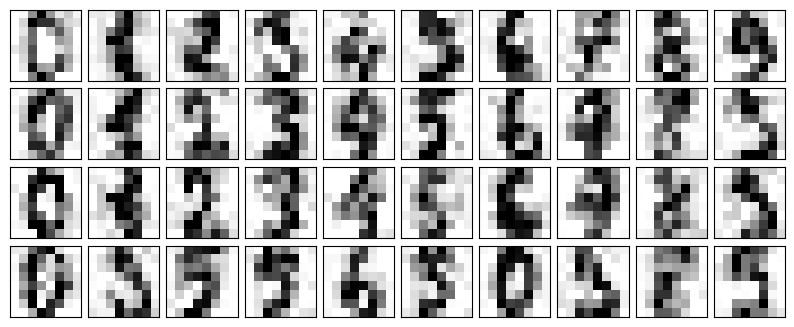

In [89]:
# PCA 를 수행한 데이터(잡음이 섞인) 를 복원
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

### LLE - 지역 선형 임베딩

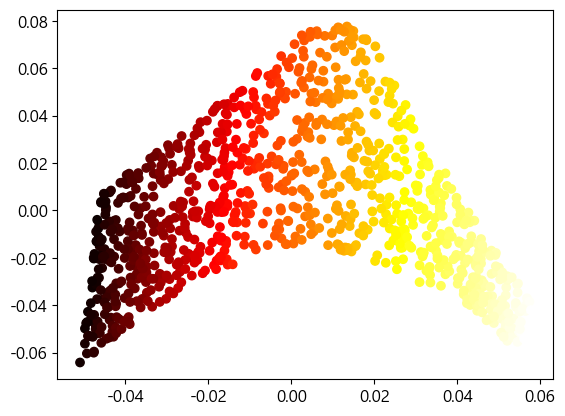

In [93]:
# 스위스 롤은 롤케익처럼 클래스가 구분된 데이터를 생성해줌
# 첫번째 리턴값은 피처 3개로 구성된 피처의 배열이고
# 두번째 리턴되는 값은 범주에 해당하는 타겟입니다.
X, t = make_swiss_roll(n_samples = 1000, noise = 0.2, random_state = 42)

from sklearn.manifold import LocallyLinearEmbedding

# 10개의 이웃을 이용해서 2개의 성분으로 축소
lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10, random_state = 42)
X_reduced = lle.fit_transform(X)

# 시각화
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = t, cmap = plt.cm.hot)
plt.show()

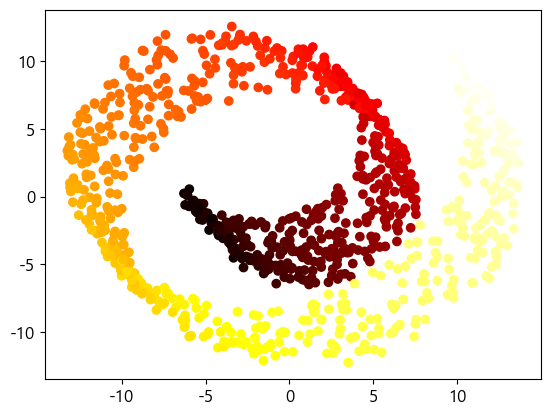

In [95]:
# PCA
lle = PCA(n_components = 2, random_state = 42)
X_reduced = lle.fit_transform(X)

# 시각화
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = t, cmap = plt.cm.hot)
plt.show()

### LDA - 선형 판별 분석

In [98]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.data[:, 0].max() - iris.data[:, 0].min()) 
print(iris.data[:, 1].max() - iris.data[:, 1].min())
print(iris.data[:, 2].max() - iris.data[:, 2].min()) # 분산이 크다!
print(iris.data[:, 3].max() - iris.data[:, 3].min())

#그냥 분석했다면, 3번이 영향을 많이 줬을 거임

3.6000000000000005
2.4000000000000004
5.9
2.4


In [101]:
from sklearn.preprocessing import MinMaxScaler # 최대 최소를 1, 0 으로 
# standard scaler을 하면 평균0, 분산 1로 하는 거라
# 최대 최소가 1, 0 을 넘어갈 수도 있다.
# 이러면 딥러닝에서 사용을 못함
# 그래서 minmaxscaler을 사용함

iris_scaled = MinMaxScaler().fit_transform(iris.data)
print(iris_scaled[:, 0].max() - iris_scaled[:, 0].min()) 
print(iris_scaled[:, 1].max() - iris_scaled[:, 1].min())
print(iris_scaled[:, 2].max() - iris_scaled[:, 2].min()) 
print(iris_scaled[:, 3].max() - iris_scaled[:, 3].min())

1.0
1.0
1.0
1.0


# 군집

## 군집의 기본적인 원리

In [102]:
# 과일 이미지 군집
fruits = np.load('data_ML/fruits_300.npy')
print(fruits.shape) # 100 * 100 이미지 300개

(300, 100, 100)


In [103]:
# 샘플 데이터 1개 출력 0~255 사이의 숫자 값을 데이터가 구성 : 흑백 이미지
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


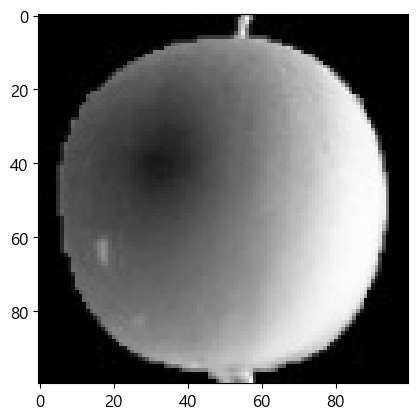

In [104]:
# 이미지 출력
plt.imshow(fruits[0], cmap = 'gray')
plt.show()

# 흑백 사진 꿀팁, 흰색 1 ~ 검정 0
# 우리가 알고 싶은건 사물인데, 보통은 배경이 흰색이고 사물이 색을 갖는다
# 따라서 사물이 값을 갖는게 좋기 때문에
# 분석 전 사진을 반전시키는게 좋다!
# 반전 시키는 경우 cmap = 'grap_r'로

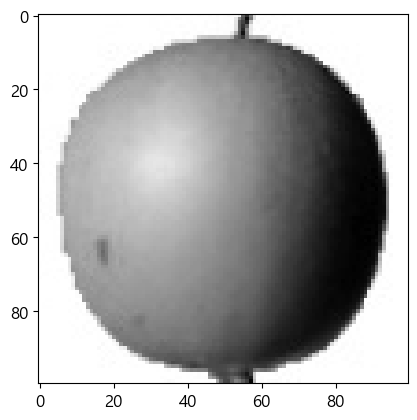

In [106]:
# 이미지 출력 - 사과
plt.imshow(fruits[0], cmap = 'gray_r')
plt.show()

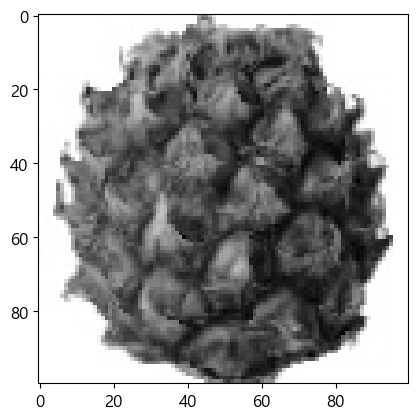

In [108]:
# 이미지 출력 - 파인애플
plt.imshow(fruits[100], cmap = 'gray_r')
plt.show()

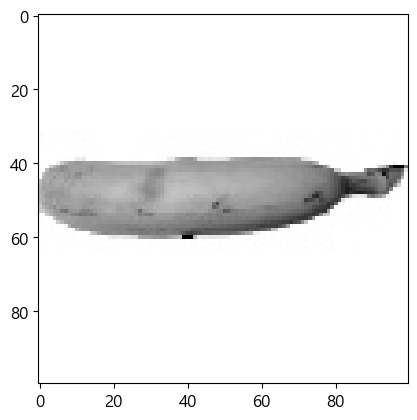

In [107]:
# 이미지 출력 - 바나나
plt.imshow(fruits[200], cmap = 'gray_r')
plt.show()

In [109]:
# 모든 이미지 데이터의 차원을 1차원으로 변경해서 과일 종류 별로 분류
apple = fruits [0 : 100].reshape(-1, 100*100)
pineapple = fruits [100 : 200].reshape(-1, 100*100)
banana = fruits [200 : 300].reshape(-1, 100*100)

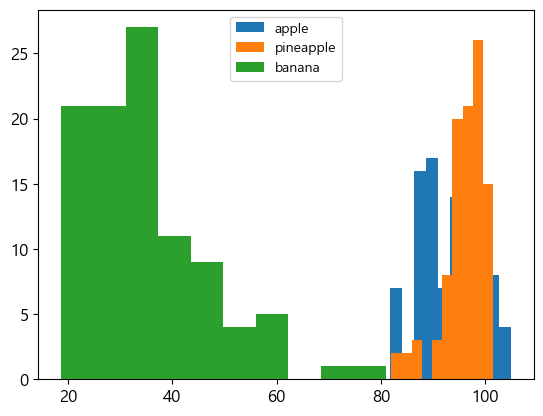

In [111]:
# 이미지 별 픽셀의 평균을 히스토 그램으로 출력
plt.hist(np.mean(apple, axis = 1))
plt.hist(np.mean(pineapple, axis = 1))
plt.hist(np.mean(banana, axis = 1))
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

# 바나나가 확 구분된다

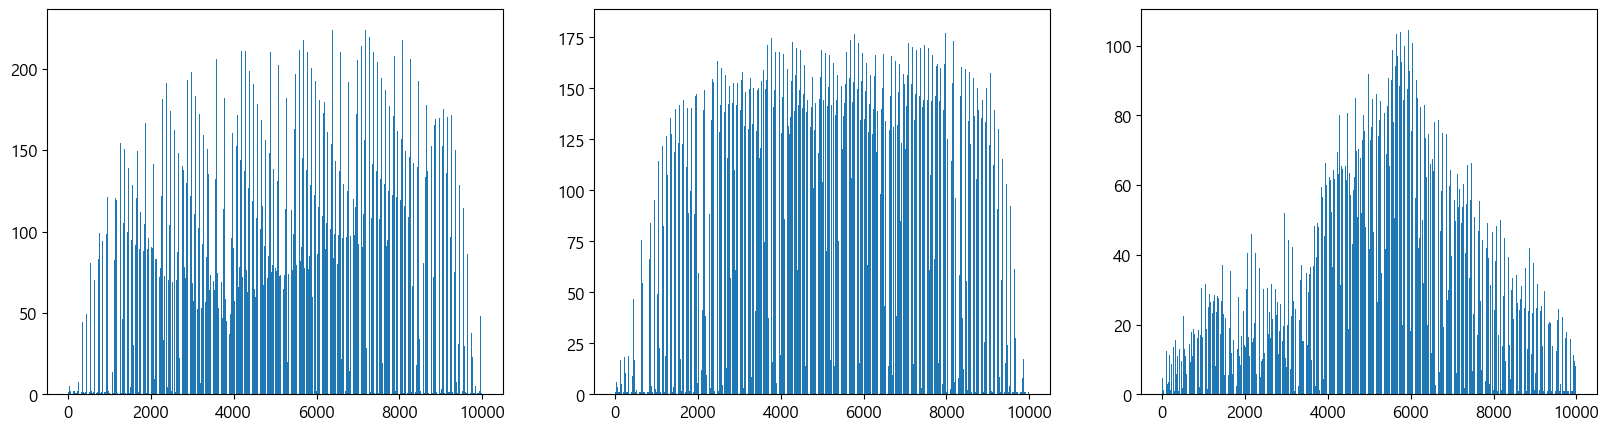

In [117]:
# 각 이미지의 픽셀 단위 값을 히스토그램으로 출력
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
axes[0].bar (range(10000), np.mean(apple, axis = 0))
axes[1].bar (range(10000), np.mean(pineapple, axis = 0))
axes[2].bar (range(10000), np.mean(banana, axis = 0))
plt.show()

# 사과와 파인애플의 픽셀별 평균은 차이가 난다

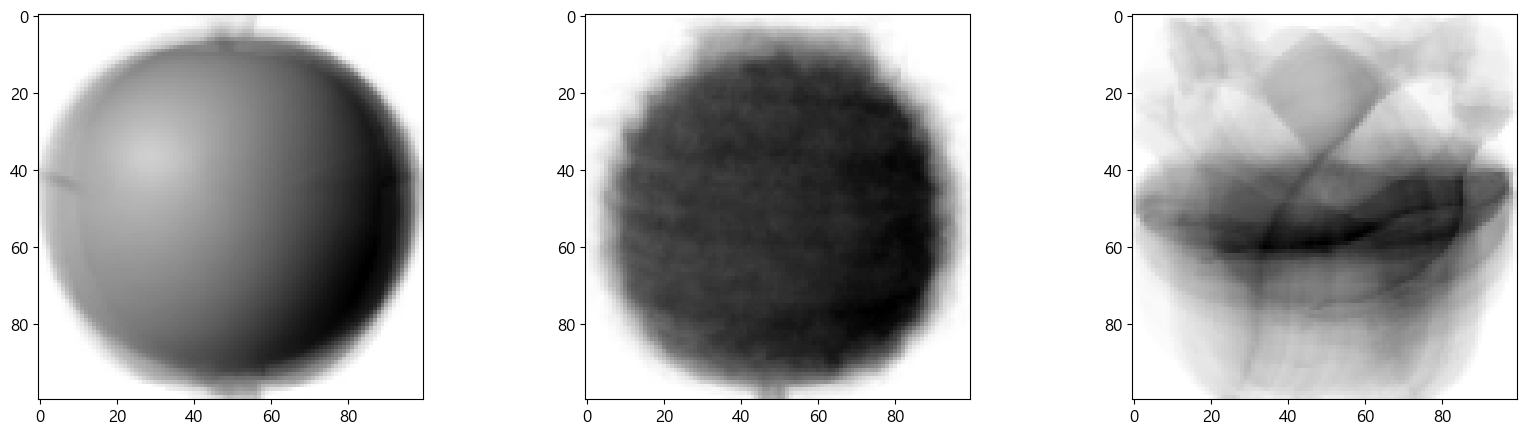

In [118]:
# 이미지 별 평균을 이미지로 출력
apple_mean = np.mean(apple, axis = 0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis = 0).reshape(100, 100)
banana_mean = np.mean(banana, axis = 0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].imshow(apple_mean, cmap = 'gray_r')
axs[1].imshow(pineapple_mean, cmap = 'gray_r')
axs[2].imshow(banana_mean, cmap = 'gray_r')
plt.show()

In [119]:
# 사과의 평균과 이미지들의 차이
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis = (1, 2))
print(abs_mean.shape)

(300,)


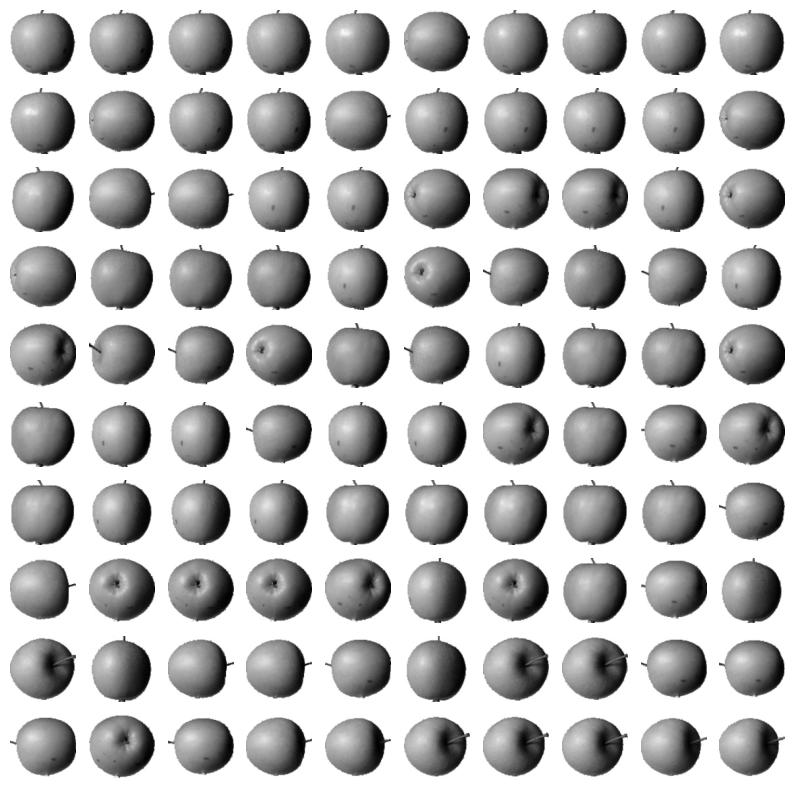

In [121]:
# 차이값이 가장 적은 100개의 데이터를 출력
apple_index = np.argsort(abs_mean)[:100]

fig, axs = plt.subplots(10, 10, figsize = (10, 10))
for i in range (10) :
    for j in range(10) :
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap = 'gray_r')
        axs[i, j].axis('off')
plt.show()

## K-mean 알고리즘

In [122]:
from sklearn.datasets import make_blobs

# 중심점의 좌표
blob_centers = np.array([[0.2, 0.3], [-1.5, 2.3],
                        [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
# 중심점에서의 편차
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# 데이터 생성
X, y = make_blobs(n_samples = 2000, centers = blob_centers,
                 cluster_std = blob_std, random_state = 42)

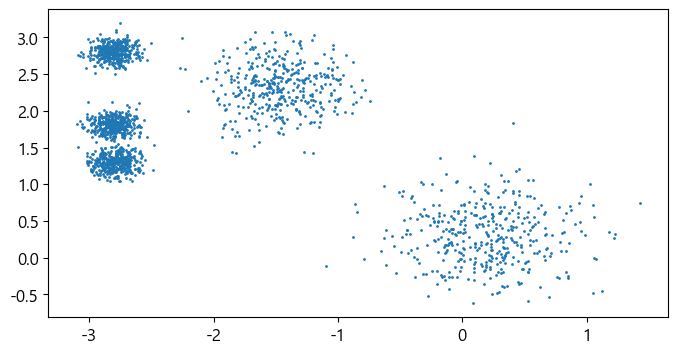

In [124]:
# 데이터 분포를 시각화 하기 위한 함수
def plot_clusters(X, y = None) :
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 1)
    
plt.figure(figsize = (8, 4))
plot_clusters(X)
plt.show()

In [127]:
# 군집을 수행
from sklearn.cluster import KMeans

# 클러스터 개수
k = 5
kmeans = KMeans(n_clusters = k, random_state = 42)
y_pred = kmeans.fit_predict(X)
print(y_pred[:100])  # 예측한 클러스터를 출력
print('---------------------------------------------------')
print(y[:100])  # 생성할 때 사용한 타겟을 출력

[3 1 0 3 1 2 0 2 4 3 0 0 3 0 2 3 3 3 1 3 2 4 2 4 1 4 4 4 2 0 4 3 2 0 1 4 4
 3 2 3 0 4 3 1 2 4 3 0 0 4 0 0 3 0 2 0 2 1 3 3 1 3 0 3 1 1 1 2 2 0 4 2 4 1
 4 0 2 3 0 4 0 1 1 0 0 1 2 2 2 4 0 3 0 3 4 1 0 2 1 2]
---------------------------------------------------
[3 0 1 3 0 4 1 4 2 3 1 1 3 1 4 3 3 3 0 3 4 2 4 2 0 2 2 2 4 1 2 3 4 1 0 2 2
 3 4 3 1 2 3 0 4 2 3 1 1 2 1 1 3 1 4 1 4 0 3 1 0 3 1 3 0 0 0 4 4 1 2 4 2 0
 2 1 4 3 1 2 1 0 0 1 1 0 4 4 4 2 1 3 1 3 2 0 1 4 0 4]


In [130]:
# 군집을 수행한 센터의 값을 출력
print(kmeans.cluster_centers_)
print('------------------------')
print(blob_centers)

# 군집은 얼추 잘 맞는다
# 중심점 순서가 달라서 위에서 숫자가 바뀌었던 것

[[-1.458  2.32 ]
 [ 0.189  0.305]
 [-2.792  1.297]
 [-2.798  2.8  ]
 [-2.804  1.809]]
------------------------
[[ 0.2  0.3]
 [-1.5  2.3]
 [-2.8  1.8]
 [-2.8  2.8]
 [-2.8  1.3]]


In [132]:
# 예측 - 분류
print(kmeans.predict(np.array([[0, 2]]))) # 0 번 할당

[0]
